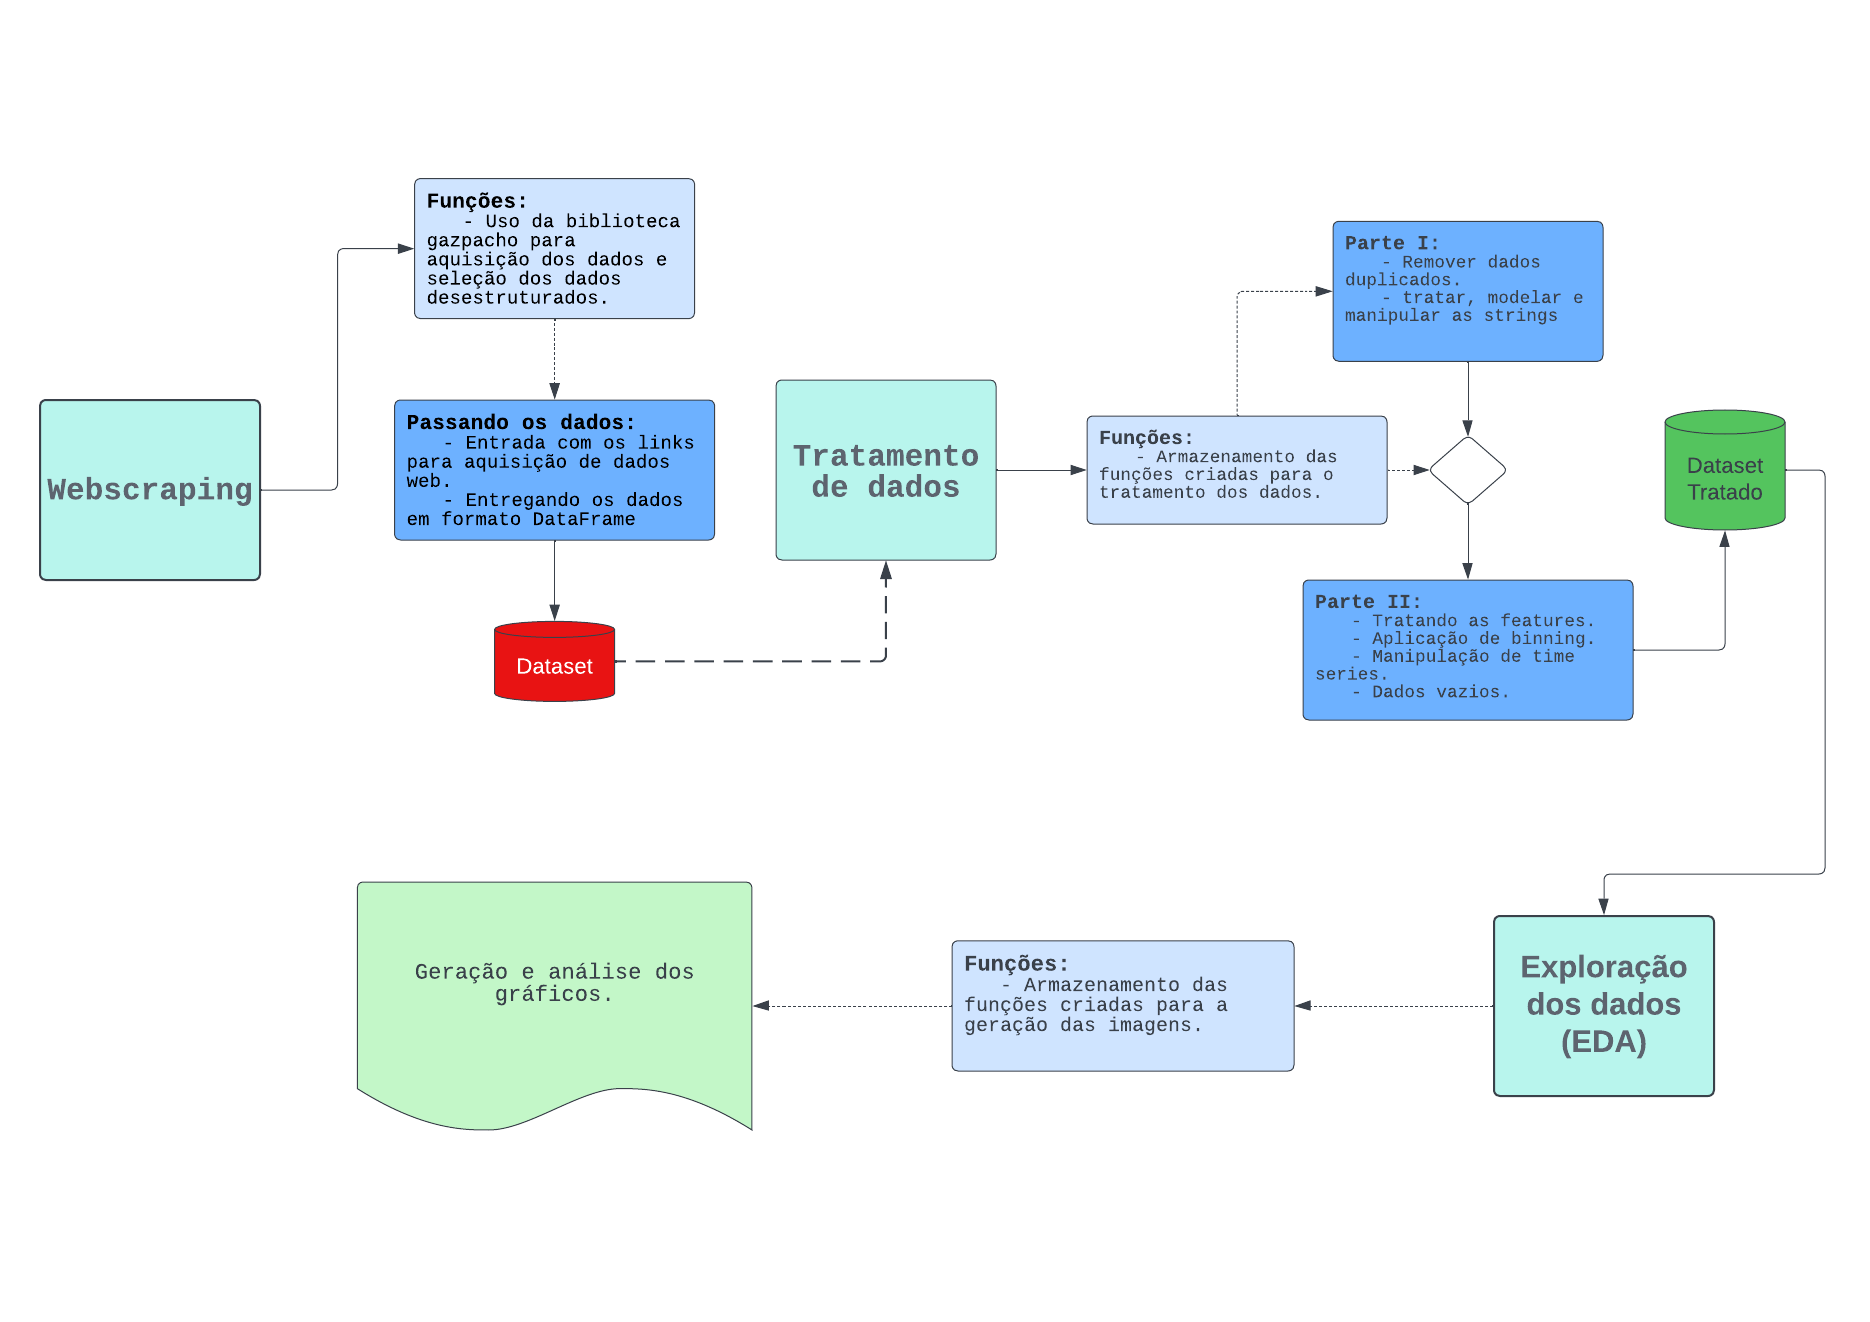

# Importações

In [ ]:
!pip install gazpacho

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gazpacho: filename=gazpacho-1.1-py3-none-any.whl size=7481 sha256=75a7ae26a3065d30c980676a18379dcfb5888b0c68c0e30bf2d876f8fec561ac
  Stored in directory: /root/.cache/pip/wheels/db/6b/a2/486f272d5e523b56bd19817c14ef35ec1850644dea78f9dd76
Successfully built gazpacho


In [ ]:
from gazpacho import get, Soup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random 

# <h1> Webscraping

## Funções

In [ ]:
def app(url):
  """

  Aplicando a biblioteca gazpacho, ela vai até o link do site e pega o código fonte, onde conseguimos retirar as informações 
  presentes lá, assim coletando nossos dados.

  """
  soup = Soup(get(url))
  lis = soup.find('li', {'class':'react-job'})
  dataset_prov = [parse_data(x) for x in lis]
  dataset.extend(dataset_prov)


def parse_data(data): 
  """

  Função que busca a informação necessária no código fonte usando o código .find, onde temos o seguinte formato (tag do item, {'classe':'nome da classe'})

  """
  companie_name = data.find('a',{'class':'jobLink'})[1].find('span').text
  vaga = data.find('a',{'class':'jobLink'})[2].find('span').text
  tipo = data.find('span',{'class':'css-1buaf54'}).text
  publicacao = data.find('div', {'class':'css-17n8uzw'}).text
  nota = data.find('span',{'class':'e1cjmv6j0'})
  if nota is None: 
    return   {
      'Empresa':companie_name,
      'Vaga':vaga,
      'Local':tipo,
      'Tempo_Publicacao':publicacao,
      'Avaliacao':None
  }
  return   {
      'Empresa':companie_name,
      'Vaga':vaga,
      'Local':tipo,
      'Tempo_Publicacao':publicacao,
      'Avaliacao':nota.text
  }


## Passando os dados

In [ ]:
urls = ['LINK FICTICIO','LINK FICTICIO','LINK FICTICIO','LINK FICTICIO']

dataset = []

for i in urls:
  app(i)

dados = pd.DataFrame(dataset)



# Tratamento de dados

## Funções

In [ ]:

# Lista de funções utilizadas no tratamento dos dados.




def change(x):
  """ Função para mudar o nome das empresas para deixar em anonimato. """
  return random.randint(100000,500000)


def experiencia(data):
  """ Função para padronizar a experiência requerida na vaga, sendo as classes: Júnior, Pleno e Sênior. """
  dt = data.copy()
  # Júnior.
  dt['Vaga'] = dt.Vaga.str.replace('jr','júnior').str.replace('junior','júnior').str.replace(' i ',' júnior ')

  # Pleno.
  dt['Vaga'] = dt.Vaga.str.replace(' ii',' pleno ').str.replace('seniorpleno','pleno')

  # Sênior.
  dt['Vaga'] = dt.Vaga.str.replace('sr','sênior').str.replace('senior','sênior').str.replace(' iii ',' sênior ')

  return dt


def selec(x):
  """ Separar o cargo oferecido. """


  eng = ["engenheiro","engenheira"]
  ds = ['cientista de dados']
  for i in ds:
    if i in x:
      return 'cientista de dados'
  for i in eng:
    if i in x:
      return 'engenheiro de dados'


def selec_1(x):
  """ Criar feature sobre a exigência do contratante. """

  if 'júnior' in x:
    return 'júnior'
  if 'sênior' in x:
    return'sênior'
  if 'pleno' in x:
    return 'pleno'
  else:
    return 'sem especificação'

def feature_3(data):
  """ Criar nova feature com as outras informações além de cargo e experiência. """
  
  dt = data.copy()
  dt['outras_info'] = data['Vaga'].copy()

  eliminar = ['júnior','sênior','pleno','cientista de dados','engenheiro de dados','engenheira de dados']
  for i in eliminar:
    dt['outras_info'] = dt['outras_info'].str.replace(f'{i}','')
  dt['outras_info'] = dt['outras_info'].str.strip()
  return dt


def binning(x):
  """ Objetivo é fazer um binning dos dados. """


  if len(x) <= 1:
    return 'Sem especificação'
  else:
    return 'Necessário especificação'


def tempo(x):
  """ Tratar os dados de tempo da publicação deixando todos em função dos dias """

  if 'horas' in x:
    return 0
  else:
    k = []
    for i in x:
      if i.isnumeric():
        k.append(i)
    return int(''.join(k))



## <h1> Parte I 

 - Tratamento de dados.
  - Remover duplicados.
  - Tratar strings:
    - Remover strings desnecessárias.
    - modificar palavras.
  - Separar os dados em cargos e experiências.


In [ ]:
# Criando uma cópia dos dados para não ser necessário aplicar a biblioteca gazpacho e buscar as informações no site.
dataset = dados.copy()

    ## Tratando dados duplicados.
print(f'\n \n \nQuantidade de dados Duplicados: {dataset.duplicated().sum()} \n \n \n')

dataset = dataset.drop_duplicates().reset_index(drop=True) # Apagar os dados duplicados.

    ## Modificando nome das empresas.
dataset.Empresa = dataset.Empresa.apply(lambda x: change(x))

dataset.head()


 
 
Quantidade de dados Duplicados: 44 
 
 



,Empresa,Vaga,Local,Tempo_Publicacao,Avaliacao
0,464773,Cientista de Dados Junior,São Paulo,17 dias,4.3
1,403213,Cientista de Dados,Campinas,17 dias,4.3
2,122718,CIENTISTA DE DADOS JUNIOR,Belo Horizonte,5 dias,3.6
3,101390,Cientista de Dados,Trabalho remoto,10 dias,3.4
4,424638,Cientista de Dados,Trabalho remoto,30 dias,4.5


In [ ]:
# Avaliar quais elementos podem ser retirados das vagas.
    ## Passar os dados para minúsculo.
dataset['Vaga'] = dataset['Vaga'].str.lower()

dataset['Vaga'].value_counts()

cientista de dados                                                  24
cientista de dados sênior                                            3
cientista de dados junior                                            3
cientista de dados sr                                                2
pessoa engenheira de dados - coe xtech                               1
cientista de dados (sql, big data e machine learning)                1
engenheiro / cientista de dados                                      1
cientista de dados sênior | iob                                      1
pessoa especialista de dados                                         1
cientista de dados pleno | produtos digitais e canais pagos          1
cientista de dados sr - foco concessão de crédito                    1
cientista de dados sr (crédito)                                      1
cientista de dados especiaista                                       1
cientista de dados (python, r, sas e matlab)                         1
cienti

In [ ]:
    ## Remover elementos que são desnecessários.
remover = ['pessoa','(',')','|','[',']','shopping nova américa/rj','remoto','/','-','remota', '100%','.']
for i in remover:
  dataset['Vaga'] = dataset['Vaga'].str.replace(f'{i}', '')

dataset['Vaga'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


cientista de dados                                                 24
cientista de dados junior                                           3
cientista de dados sênior                                           3
cientista de dados sr                                               3
cientista de dados  analista iii  telecine                          1
engenheiro  cientista de dados                                      1
cientista de dados sênior  iob                                      1
 especialista de dados                                              1
cientista de dados pleno  produtos digitais e canais pagos          1
cientista de dados sr  foco concessão de crédito                    1
cientista de dados sr crédito                                       1
cientista de dados especiaista                                      1
cientista de dados python, r, sas e matlab                          1
analista de dados sql                                               1
cientista de dados e

In [ ]:
    ## Corrigir nome do nível de experiência exigido pela empresa.
dataset = experiencia(dataset)

In [ ]:
dataset['Vaga'].value_counts()

cientista de dados                                                      24
cientista de dados sênior                                                6
cientista de dados júnior                                                5
 engenheira de dados  coe xtech                                          1
cientista de dados sql, big data e machine learning                      1
engenheiro  cientista de dados                                           1
cientista de dados sênior  iob                                           1
 especialista de dados                                                   1
cientista de dados pleno  produtos digitais e canais pagos               1
cientista de dados sênior  foco concessão de crédito                     1
cientista de dados sênior crédito                                        1
cientista de dados especiaista                                           1
cientista de dados python, r, sas e matlab                               1
cientista de dados  anali

In [ ]:
    ## Criar feature sobre o cargo.
dataset['Cargo'] = dataset.Vaga.apply(lambda x: selec(x))

    ## Criar feature sobre a experiência exigida. 
dataset['Experiência'] = dataset.Vaga.apply(lambda x: selec_1(x))

dataset.head(10)

,Empresa,Vaga,Local,Tempo_Publicacao,Avaliacao,Cargo,Experiência
0,464773,cientista de dados júnior,São Paulo,17 dias,4.3,cientista de dados,júnior
1,403213,cientista de dados,Campinas,17 dias,4.3,cientista de dados,sem especificação
2,122718,cientista de dados júnior,Belo Horizonte,5 dias,3.6,cientista de dados,júnior
3,101390,cientista de dados,Trabalho remoto,10 dias,3.4,cientista de dados,sem especificação
4,424638,cientista de dados,Trabalho remoto,30 dias,4.5,cientista de dados,sem especificação
5,348535,cientista de dados,São Paulo,20 dias,NaN,cientista de dados,sem especificação
6,447296,cientista de dados,Trabalho remoto,4 dias,4.7,cientista de dados,sem especificação
7,329365,cientista de dados especialista,Recife,4 dias,4.5,cientista de dados,sem especificação
8,404539,cientista de dados sênior,São Paulo,24 dias,4.3,cientista de dados,sênior
9,285689,cientista de dados júnior,São Paulo,13 dias,4.3,cientista de dados,júnior


## <h1> Parte II

- Tratamento de dados.
  - Tratar strings.
    - Tratar outras informações presentes nas vagas.
  - Aplicar o binning criando novas features.
  - Tratar os dados de tempo de publicação da vaga.
  - Tratar dados vazios

In [ ]:
    ## Criar uma feature com as outras informações além de cargo e experiência.
dataset = feature_3(dataset)

dataset['outras_info'].value_counts()

                                                     45
crédito                                               2
especialista                                          2
especialista de dados                                 1
coe xtech                                             1
sql, big data e machine learning                      1
bi                                                    1
analista de dados   para minsait an indra company     1
foco no relacionamento com o usuário                  1
foco em crédito                                       1
analista de dados sql                                 1
analista  i  telecine                                 1
python, r, sas e matlab                               1
especiaista                                           1
foco concessão de crédito                             1
produtos digitais e canais pagos                      1
iob                                                   1
engenheiro                                      

In [ ]:
    ## Agora pode-se fazer uma limpeza nas informações restante.
eliminar = ['especialista','especialista de dados',' i ','analista de dados','para', 'especiaista','em indiferente','de dados','analista','engenheiro',' a']

for i in eliminar:
  dataset['outras_info'] = dataset['outras_info'].str.replace(f'{i}','')

# Eliminar espaços vazios.
dataset['outras_info'] = dataset['outras_info'].str.strip()
dataset['outras_info'].value_counts()
  

                                         51
crédito                                   2
produtos digitais e canais pagos          1
coe xtech                                 1
sql, big data e machine learning          1
bi                                        1
minsaitn indra company                    1
foco no relacionamento com o usuário      1
foco em crédito                           1
sql                                       1
telecine                                  1
python, r, sas e matlab                   1
foco concessão de crédito                 1
iob                                       1
inteligência e soluções  o consumidor     1
sympla                                    1
corporativo                               1
dialogflow                                1
gribusiness                               1
foco em controladoria                     1
azure                                     1
minsait  pt jpa                           1
tecnologia   enalytics          

In [ ]:
    ## Para uma análise estatística, vou utilizar o binning, basicamente separa os dados em binários, sendo que há uma exigência em uma certa área ou não. 
dataset['Especificacao'] = dataset['outras_info'].apply(lambda x: binning(x))

    ## Passar os dados de tempo para númericos e em dias.
dataset['Tempo_Publicacao'] = dataset.Tempo_Publicacao.apply(lambda x: tempo(x))

    ## Modificar avaliação para tipo float.
dataset['Avaliacao'] = dataset['Avaliacao'].astype(float)

In [ ]:
# Para verificar se há dados faltantes.
dataset.isnull().sum()[dataset.isnull().sum()>0]

Avaliacao    6
Cargo        4
dtype: int64

In [ ]:
# Como os dados não tem outliers por ser em um range, utilizar a média para preencher esses vázios.
dataset['Avaliacao'] = dataset['Avaliacao'].fillna(dataset['Avaliacao'].mean())

In [ ]:
dataset.loc[dataset['Cargo'].isnull()]

,Empresa,Vaga,Local,Tempo_Publicacao,Avaliacao,Cargo,Experiência,outras_info,Especificacao
26,384911,analista de dados foco em controladoria,Porto Alegre,0,4.4,None,sem especificação,foco em controladoria,Necessário especificação
49,217541,especialista de dados,Trabalho remoto,18,4.0,None,sem especificação,,Sem especificação
58,102062,analista de dados sql,Trabalho remoto,30,4.2,None,sem especificação,sql,Necessário especificação
67,166337,analista de dados júnior para minsait an indr...,São Paulo,28,4.0,None,júnior,minsaitn indra company,Necessário especificação


In [ ]:
# Esses cargos são para analistas de dados, como a ciência de dados é uma área que também abrange essa função, vou preencher com essa categoria. 
dataset['Cargo'] = dataset['Cargo'].fillna(dataset['Cargo'].mode()[0])

# <H1> Exploração dos dados (EDA) </h1>

- Visualização geral dos dados (dispersão).
- Trabalhar com dados específicos:
  - Análise das ofertas de trabalho para Júnior e Sem Especificação.
  - Análise das ofertas de trabalho Remoto

## Funções

### Gráfico 1

In [ ]:
def imagem_1():
  """

 Função na qual é composta por 4 gráficos, utilizando um subplot.
 2 gráficos de pizza e 2 gráficos de barra.
 
  """
  fig = plt.figure(figsize=(25,30))
  props = dict(boxstyle='round', facecolor='white')
  fig.subplots_adjust(wspace=0.2, hspace=0.5) 

  plt.suptitle('Visão Geral dos dados', fontsize=30, y=0.95)
  # ------------------------============
  #     #######     Subplot 1  ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 

  axes1 = plt.subplot2grid(
      (6,2),
      (0,0),
      rowspan=2
  )

    ## Gráfico
  explode = (0, 0, 0.3, 0) 
  dat = dataset['Experiência'].value_counts()/dataset['Experiência'].shape[0]
  colors = ['lightpink','lightgreen','yellow','lightsalmon']

  fig_1 = axes1.pie(
      x = dat, 
      labels=dat.index, 
      autopct=lambda p: f' {p:.2f}% | Total:{round((p/100)*dataset.shape[0])}',
      explode=explode,
      startangle=25, 
      shadow=True,
      pctdistance=0.7,
      textprops={
        'fontsize': 12,
        'fontfamily':'Tahoma'},
        colors=colors
  ) 

    ## Configurações
  plt.title('Experiência Exigida', fontsize=20, y=1.05, bbox=props)

  # ------------------------============
  #     #######     Subplot 2  ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes2 = plt.subplot2grid(
      (6,2),
      (0,1),
      rowspan=2
  )

    ## Gráfico
  dt_2 = dataset['Cargo'].value_counts()
  colors = ['lightcoral','lightsteelblue']
  explode = (0, .1)
  fig_2 = plt.pie(
      x = dt_2,
      labels = dt_2.index,
      autopct=lambda p: f'{p:.2f}% | total: {round((p/100)*dataset.shape[0])}',
      textprops={
          'fontsize':12,
        'fontfamily':'Tahoma'
      },
      colors=colors,
      startangle=10,
      shadow=True,
      explode = explode
  )

    ## Configurações
  plt.title('Cargos', fontsize=20, y=1.05, bbox= props)


  # ------------------------============
  #     #######     Subplot 3  ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes1 = plt.subplot2grid(
      (6,2),
      (2,0),
      colspan=2,
      rowspan=2
  )

    ## Gráfico
  fig_3 = sns.barplot(
      ax=axes1,
       x=dataset['Local'].value_counts().index,
        y=dataset['Local'].value_counts().astype(int),
         palette='magma'
  )

    ## Texto
  for i in fig_3.patches:
    sh = dataset.shape[0]
    X = i.get_xy()[0]

    fig_3.annotate(
      f'    Total:{int(i.get_height())}\npct:{(i.get_height()/sh)*100:.2f}%',
      xy=(
          X,
          i.get_height() + 0.5
      ),
      fontsize=10,
      fontfamily='Tahoma'
  )


    ## Configurações
  fig_3.set_title('Local de Trabalho', fontsize=20, bbox=props, y=0.9)

  fig_3.spines['top'].set_visible(False)
  fig_3.spines['right'].set_visible(False)
  fig_3.spines['left'].set_visible(False)
  fig_3.set( ylabel='')

  fig_3.tick_params(axis='y',left=False, labelleft=False )


  # ------------------------============
  #     #######     Subplot 4  ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes2 = plt.subplot2grid(
      (6,2),
      (4,0),
      rowspan=2,
      colspan=2
  )


    ## Gráfico
  fig_4 = sns.countplot(ax=axes2, x=dataset['Tempo_Publicacao'], palette='crest')

    ## Texto
  for i in fig_4.patches:
    
    X = i.get_xy()[0]
    sh = dataset.shape[0]
    fig_4.annotate(
      f'    Total:{int(i.get_height())}\npct:{(i.get_height()/sh)*100:.2f}%',
      xy=(
          X,
          i.get_height() + 0.5
      ),
      fontsize=10
  )
    

    ## Configurações
  fig_4.spines['top'].set_visible(False)
  fig_4.spines['right'].set_visible(False)
  fig_4.spines['left'].set_visible(False)

  fig_4.set_title('Dias da postagem', fontsize=20, y=0.9, bbox=props)

  fig_4.set(ylabel='')
  fig_4.tick_params(axis='y',left=False, labelleft=False )

# ---------------------------------------------------





### Gráfico 2

In [ ]:
def imagem_2():
  """
  Histograma da distribuição da avaliação das empresas contratantes
  """
  plt.figure(figsize=(30,10))
  props = dict(boxstyle='round', facecolor='white')

    ## Medidas Centrais
  mean = dataset['Avaliacao'].astype('float').mean()
  median = dataset['Avaliacao'].astype('float').median()
  mode = dataset['Avaliacao'].astype('float').mode()[0]

    ## Gráficos
  fig = sns.histplot(dataset['Avaliacao'].astype('float'), bins=15, kde=True, color='coral')
  fig.axvline(mean , color='r', linestyle='--')
  fig.axvline(median , color='green')
  fig.axvline(mode , color='lightgreen', linestyle='dashed')

    ## Configurações
  fig.tick_params(axis='y',left=False, labelleft=False )
  fig.set(xlabel='', ylabel='')

  fig.legend(['kde',f'Média: {mean:.2f}',f'Mediana: {median}',f'Moda: {mode}'], loc='upper left', fontsize='x-large')

  fig.set_title('Avaliação das empresas', y=1.1, fontsize=25, bbox=props)

  fig.spines['right'].set_visible(False)
  fig.spines['top'].set_visible(False)
  fig.spines['left'].set_visible(False)


### Gráfico 3

In [ ]:
def imagem_3():

  ############## Funções do gráfico ################
  def spines_off(fig):
    """
    Função para retirar grids do gráfico.
    
    fig:Figura criada
    """
    fig.spines['right'].set_visible(False)

    fig.spines['top'].set_visible(False)

    fig.spines['left'].set_visible(False)
    return fig

  def titulo(entrada, y ): 
    """
    Função para criar o título do gráfico.

    entrada : String do título,
    y : posição do título.
    """
    props = dict(boxstyle='round4', facecolor='white')
    return plt.title(f'{entrada}',fontsize=20, fontfamily='DejaVu Sans',bbox=props, y=y)

  def pizza(df,sh,colors=None, explode=None):
    """
    Função para criar o gráfico de pizza

    df : Função em value_counts(),
    sh : tamanho do dataset,
    Colors : Cores, 
    exploder : para uma parte dos dados de afastar do centro.
    """
    figura = plt.pie(
        x = df,
        labels = df.index,
        autopct=lambda p: f'pct: {p:.2f}%\nTotal:{round((p/100)*sh)}',
        textprops={
            'fontsize':12,
            'fontfamily':'DejaVu Sans'
        },
        colors=colors,
        explode = explode,
        shadow=True
    )

    return figura


  ############## Configurações de imagem ###########

  figura = plt.figure(figsize=(35,30))
  plt.suptitle('Análise com base nos dados de experiência: Júnior e Sem Especificação',fontsize=35, fontfamily='DejaVu Sans', y=0.95)



  # ------------------------============
  #     #######     Subplot 1  ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes_1 = plt.subplot2grid(
      (4,3),
      (0,0),
      rowspan=2
  )
      ## Gráfico 

  explode = (0,0.1)
  dt_1 = dataset.loc[(dataset['Cargo'] == 'cientista de dados')  & ((dataset['Experiência'] == 'júnior') | (dataset['Experiência'] == 'sem especificação'))]
  dt_1_ = dt_1['Experiência'].value_counts()
  sh = dt_1.shape[0]
  colors = ['paleturquoise','turquoise']

  fig_1 = pizza(dt_1_, sh, colors, explode)

      ## Configurações
  props_1 = dict(boxstyle='square', facecolor='white')
  plt.annotate(f'Total: {sh}',xy=(-1.25,-1), fontsize=15, fontfamily='DejaVu Sans', bbox=props_1)

  titulo('Nível de experiência dos cargos', y=1.12)


  # ------------------------============
  #     #######     Subplot 2  ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes_2 = plt.subplot2grid(
      (4,3),
      (0,1),
      rowspan=2,
      colspan=2
  )
      ## Gráfico 
  dt_2 = dt_1['Local'].value_counts()
  fig_2 = sns.barplot(
      ax= axes_2,
      x = dt_2.index,
      y = dt_2,
      palette = 'crest'

  )
      ## Texto
  for i in fig_2.patches:
    y = i.get_height()
    x = i.get_xy()[0]

    fig_2.annotate(
      f'   Total:{int(y)}\n   {(y/sh)*100:.2f}%',
      xy=(
          x,
          y + 0.2,
      ),
      fontfamily='DejaVu Sans'
    )


      ## Configurações
  fig_2 = spines_off(fig_2)

  fig_2.tick_params(axis ='y', left=False, labelleft=False)
  fig_2.set( ylabel='')
  titulo('Locais com oferta de trabalho',y=0.96)

  # ------------------------============
  #     #######      Subplot 3 ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes_3 = plt.subplot2grid(
      (4,3),
      (2,0),
      colspan=2,
      rowspan=2
  )
      ## Gráfico 
  dt_3 = dt_1['Tempo_Publicacao'].value_counts()
  fig_3 = sns.barplot(
      ax = axes_3,
      x = dt_3.index,
      y = dt_3,
      palette = 'viridis'
  )

  for i in fig_3.patches:
    y = i.get_height()
    x = i.get_xy()[0]

    fig_3.annotate(
      f'    Total:{int(y)}\n     {(y/sh)*100:.2f}%',
      xy=(
          x,
          y + 0.2,
      ),
      fontfamily='DejaVu Sans'
    )


      ## Configurações
  fig_3 = spines_off(fig_3)

  titulo('Dias da postagem ', y=0.96)

  # ------------------------============
  #     #######      Subplot 4 ######      ######
  ######       ######       ######
  # ------------------------============

      ## Axes 
  axes_4 = plt.subplot2grid(
      (4,3),
      (2,2),
      rowspan=2
      
  )
      ## Gráfico 
  dt_4 = dt_1['Especificacao'].value_counts()
  colors =  ['limegreen','lightcoral']
  fig_4 = pizza(dt_4, sh,colors=colors, explode=explode)

      ## Configurações

  titulo('Especificações requeridas na oferta', y=1.1);




### Gráfico 4

In [ ]:
def imagem_4():
  ############## Funções dos Gráficos  ####################
  def pizza(df, sh, colors=None, explode=None):
    fig = plt.pie(
        x = df,
        labels= df.index,
        shadow=True,
        colors=colors,
        explode=explode,
        textprops={
            'fontsize':12,
            'fontfamily':'DejaVu Sans'
        },
        autopct=lambda p: f'    pct:{p:.2f}%\n    Total:{round((p/100)*sh)}',
        startangle=25
    )

  def titulo(entrada, y):
    props = dict(boxstyle='round4', facecolor='antiquewhite')
    return plt.title(entrada, y=y, fontsize=20, fontfamily='DejaVu Sans', bbox=props)


  def spines_off(figur):
    figur.spines['top'].set_visible(False)
    figur.spines['left'].set_visible(False)
    figur.spines['right'].set_visible(False)
    return figur

  def lab_tic_off(figur):
    figur.tick_params(axis ='y', left=False, labelleft=False)
    figur.set( ylabel='')
    return figur
  ############## Informações da Imagem ####################
  figura = plt.figure(figsize=(25, 40))
  plt.suptitle('Análise gráfica dos dados do tipo Trabalho Remoto', fontsize=30, y=0.95)
  dt_4_ = dataset.loc[(dataset['Local'] == 'Trabalho remoto') & (dataset['Cargo'] == 'cientista de dados')]
  sh = dt_4_.shape[0]
  explode = (0, 0.1)
  colors = ['violet','thistle']

    # ------------------------============
    #     #######     Subplot 1  ######      ######
    ######       ######       ######
    # ------------------------============

        ## Axes 
  axes_1 = plt.subplot2grid(
      (6,2),
      (0,0),
      rowspan = 2,
      colspan = 2
  )

      ## Gráfico
  fig_1 = sns.histplot(
      x = dt_4_['Avaliacao'],
      kde=True,
  )

      ## Configurações
  fig_1 = spines_off(fig_1)
  fig_1 = lab_tic_off(fig_1)
  titulo('Avaliação das ofertas de emprego',1.05)    


    # ------------------------============
    #     #######     Subplot 2  ######      ######
    ######       ######       ######
    # ------------------------============

        ## Axes 
  axes_2 = plt.subplot2grid(
      (6,2),
      (2,0),
      rowspan=2,
  )

      ## Gráfico

  dt_2 = dt_4_['Experiência'].value_counts()  
  fig_2 = pizza(dt_2, sh, explode=explode, colors=colors)


      ## Texto
      ## Configurações
  titulo('Experiência Requerida',0.95)



    # ------------------------============
    #     #######     Subplot 3  ######      ######
    ######       ######       ######
    # ------------------------============

        ## Axes       
  axes_3 = plt.subplot2grid(
      (6,2),
      (2,1),
      rowspan=2
  )

      ## Gráfico

  dt_3 = dt_4_['Especificacao'].value_counts()  
  fig_3 = pizza(dt_3, sh,explode=explode, colors=colors)
      ## Texto
      ## Configurações
  titulo('Especificação exigida',0.95)


    # ------------------------============
    #     #######     Subplot 4  ######      ######
    ######       ######       ######
    # ------------------------============

        ## Axes             
  axes_4 = plt.subplot2grid(
      (6,2),
      (4,0),
      rowspan=2,
      colspan=2
  )

      ## Gráfico
  dt_4 = dt_4_['Tempo_Publicacao'].value_counts()
  fig_4 = sns.barplot(
      x=dt_4.index,
      y = dt_4,
      palette ='magma'
  )
      ## Texto
  for i in fig_4.patches:
    x = i.get_xy()[0]
    y = i.get_height()
    fig_4.annotate(
        f' Total: {y}',
        xy=(x+0.2, y+0.1),
        fontsize=12
    )
      ## Configurações
  fig_4 = spines_off(fig_4)
  fig_4 = lab_tic_off(fig_4)
  titulo('Dias da postagem',0.95);

## Análise

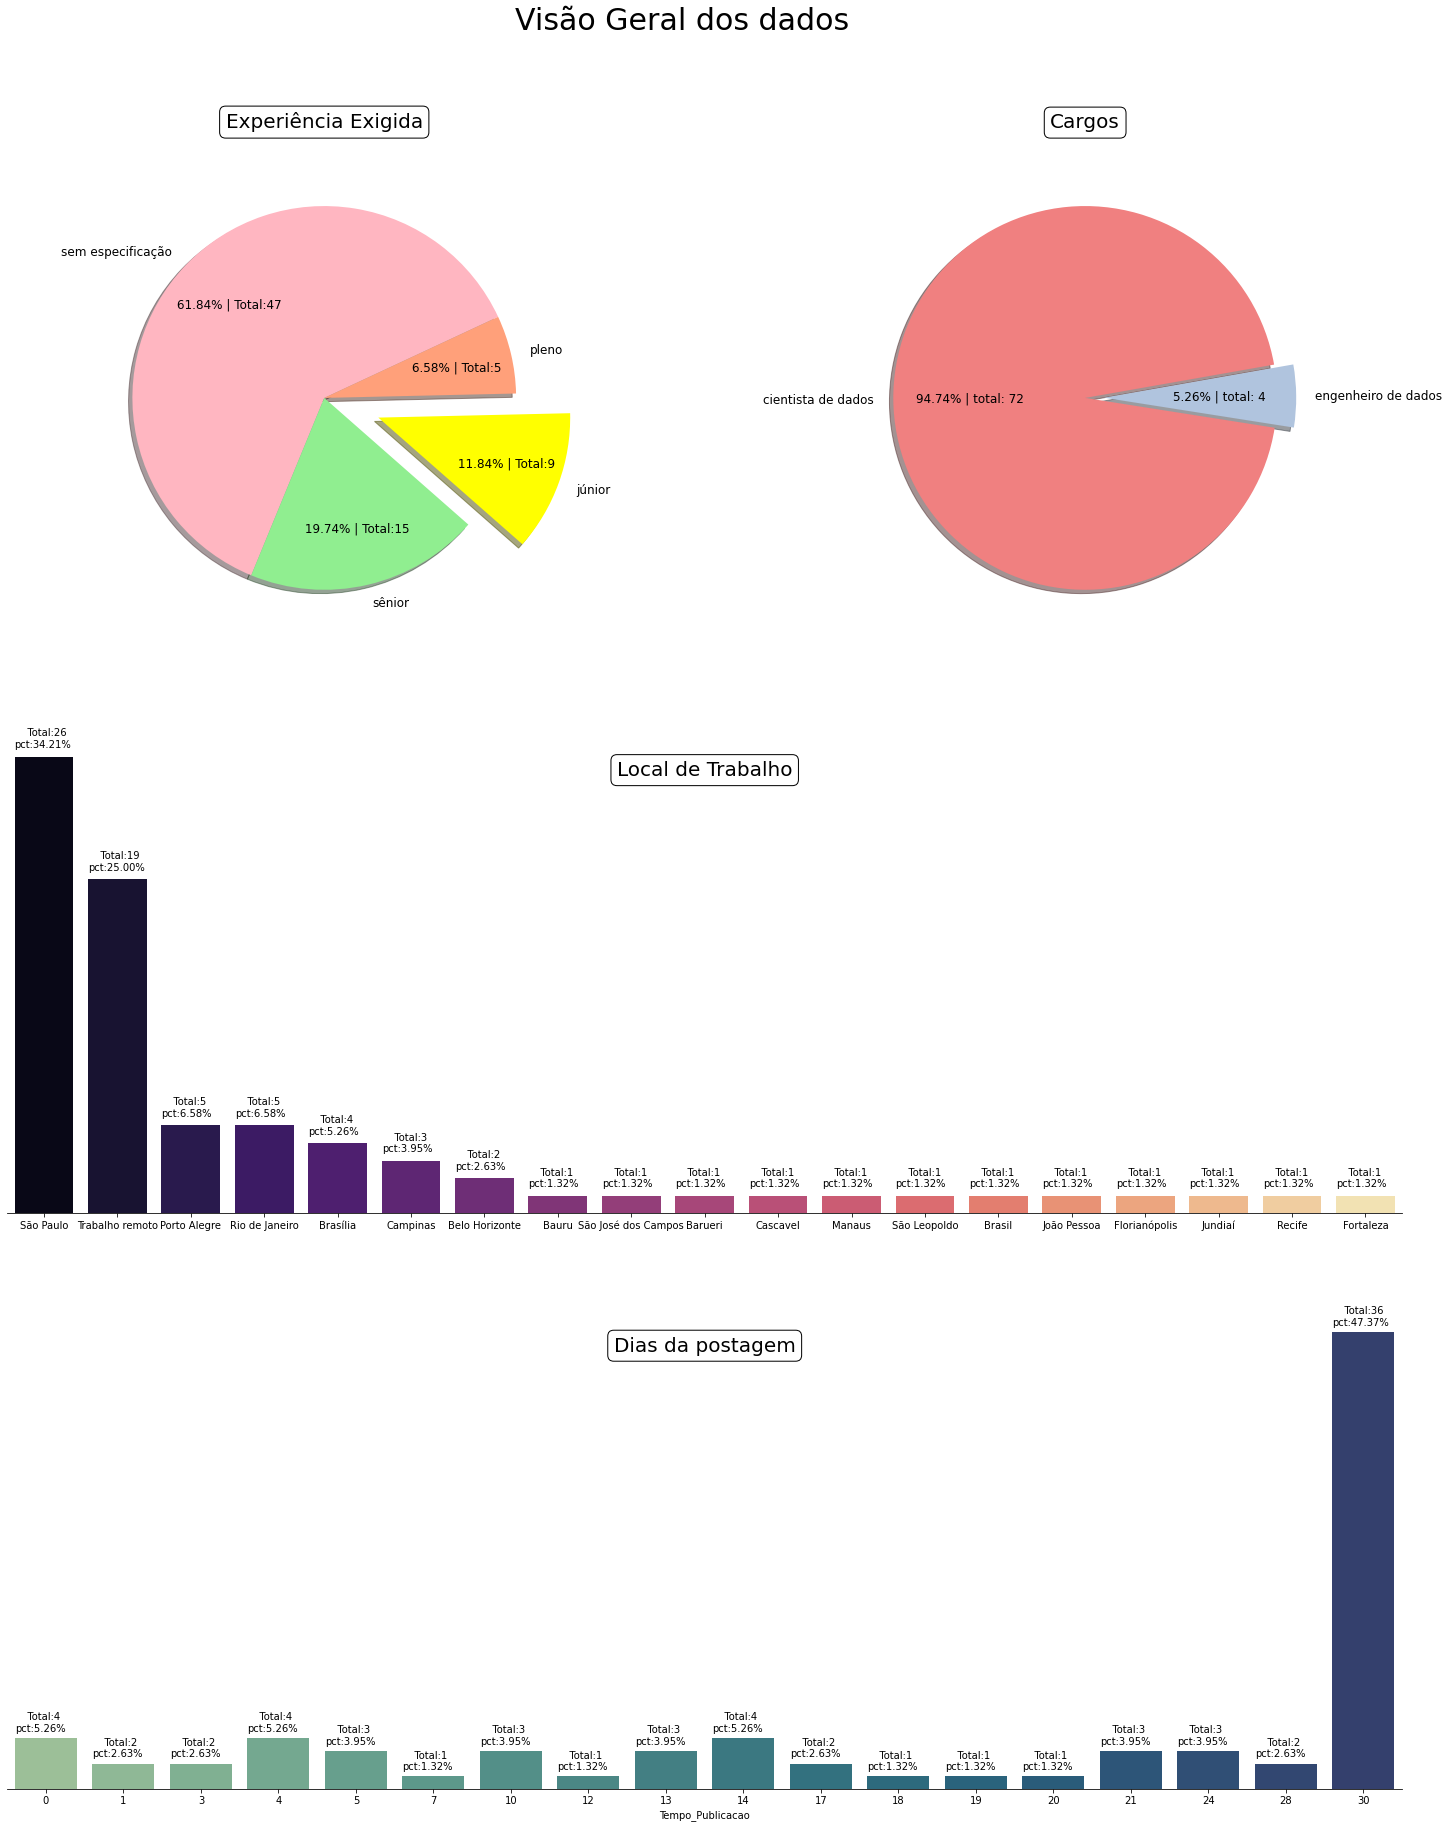

In [ ]:
imagem_1()

<h2>Visão Geral dos Dados: Análise dos gráficos </h2>
 
 
 
- <h4> Avaliando o primeiro gráfico de pizza é possível observar que o nível de experiência exigido pelo contratante, em sua maioria, não é especificado na oferta de trabalho. Como meu foco nesta análise é a procura de vaga para um profissional recente na área, os dados mais importantes são os: Júnior (11.84%) e o sem especificação (61.84%), então teoricamente esse profissional teria como se candidatar para mais de 70 % das vagas coletadas.
 
- <h4>Os dados foram coletados em uma pesquisa para cientista de dados, mas junto com a coleta vinham outras ofertas, sendo elas: engenheiro de dados e analista de dados. Como o cientista de dados pode fazer também a função de um analista de dados, acabei os classificando como oferta para cientista de dados, assim temos a grande maioria das ofertas oferecidas sendo de cientista de dados.
 
- <h4>O local de trabalho ajuda a identificar onde esse recente profissional pode ter mais chances de encontrar uma vaga, sendo observado São Paulo e o Trabalho Remoto como as vagas mais abundantes, compondo juntas mais de 50% das vagas.
- <h4>O último gráfico apresenta a quantos dias atrás essas vagas foram postadas, isso auxilia ao profissional recém formado a saber a média de quanto em quanto tempo surge uma nova oportunidade que pode ser aproveitada, tendo aqui em média de a cada 2 dias surgir 2 novas vagas de emprego.



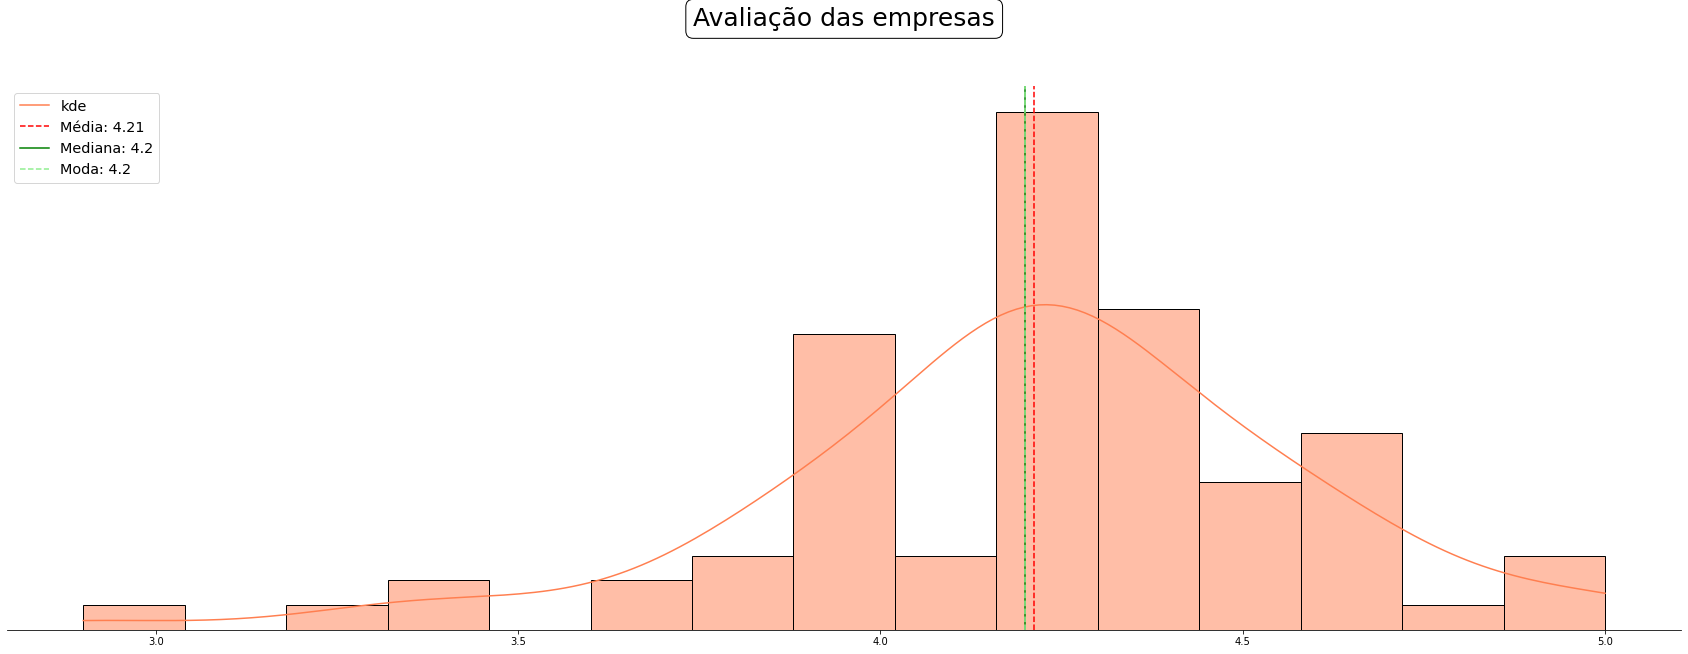

In [ ]:
imagem_2()

<h2>Avaliação das empresas: Análise gráfica</h2>


- <h4>A plataforma fornece uma avaliação da empresa, com um range de 0 - 5, vemos que a maioria das empresas apresenta uma nota acima de 4, tendo seus valores de medida central de 4.2, ou seja, são boas empresas.

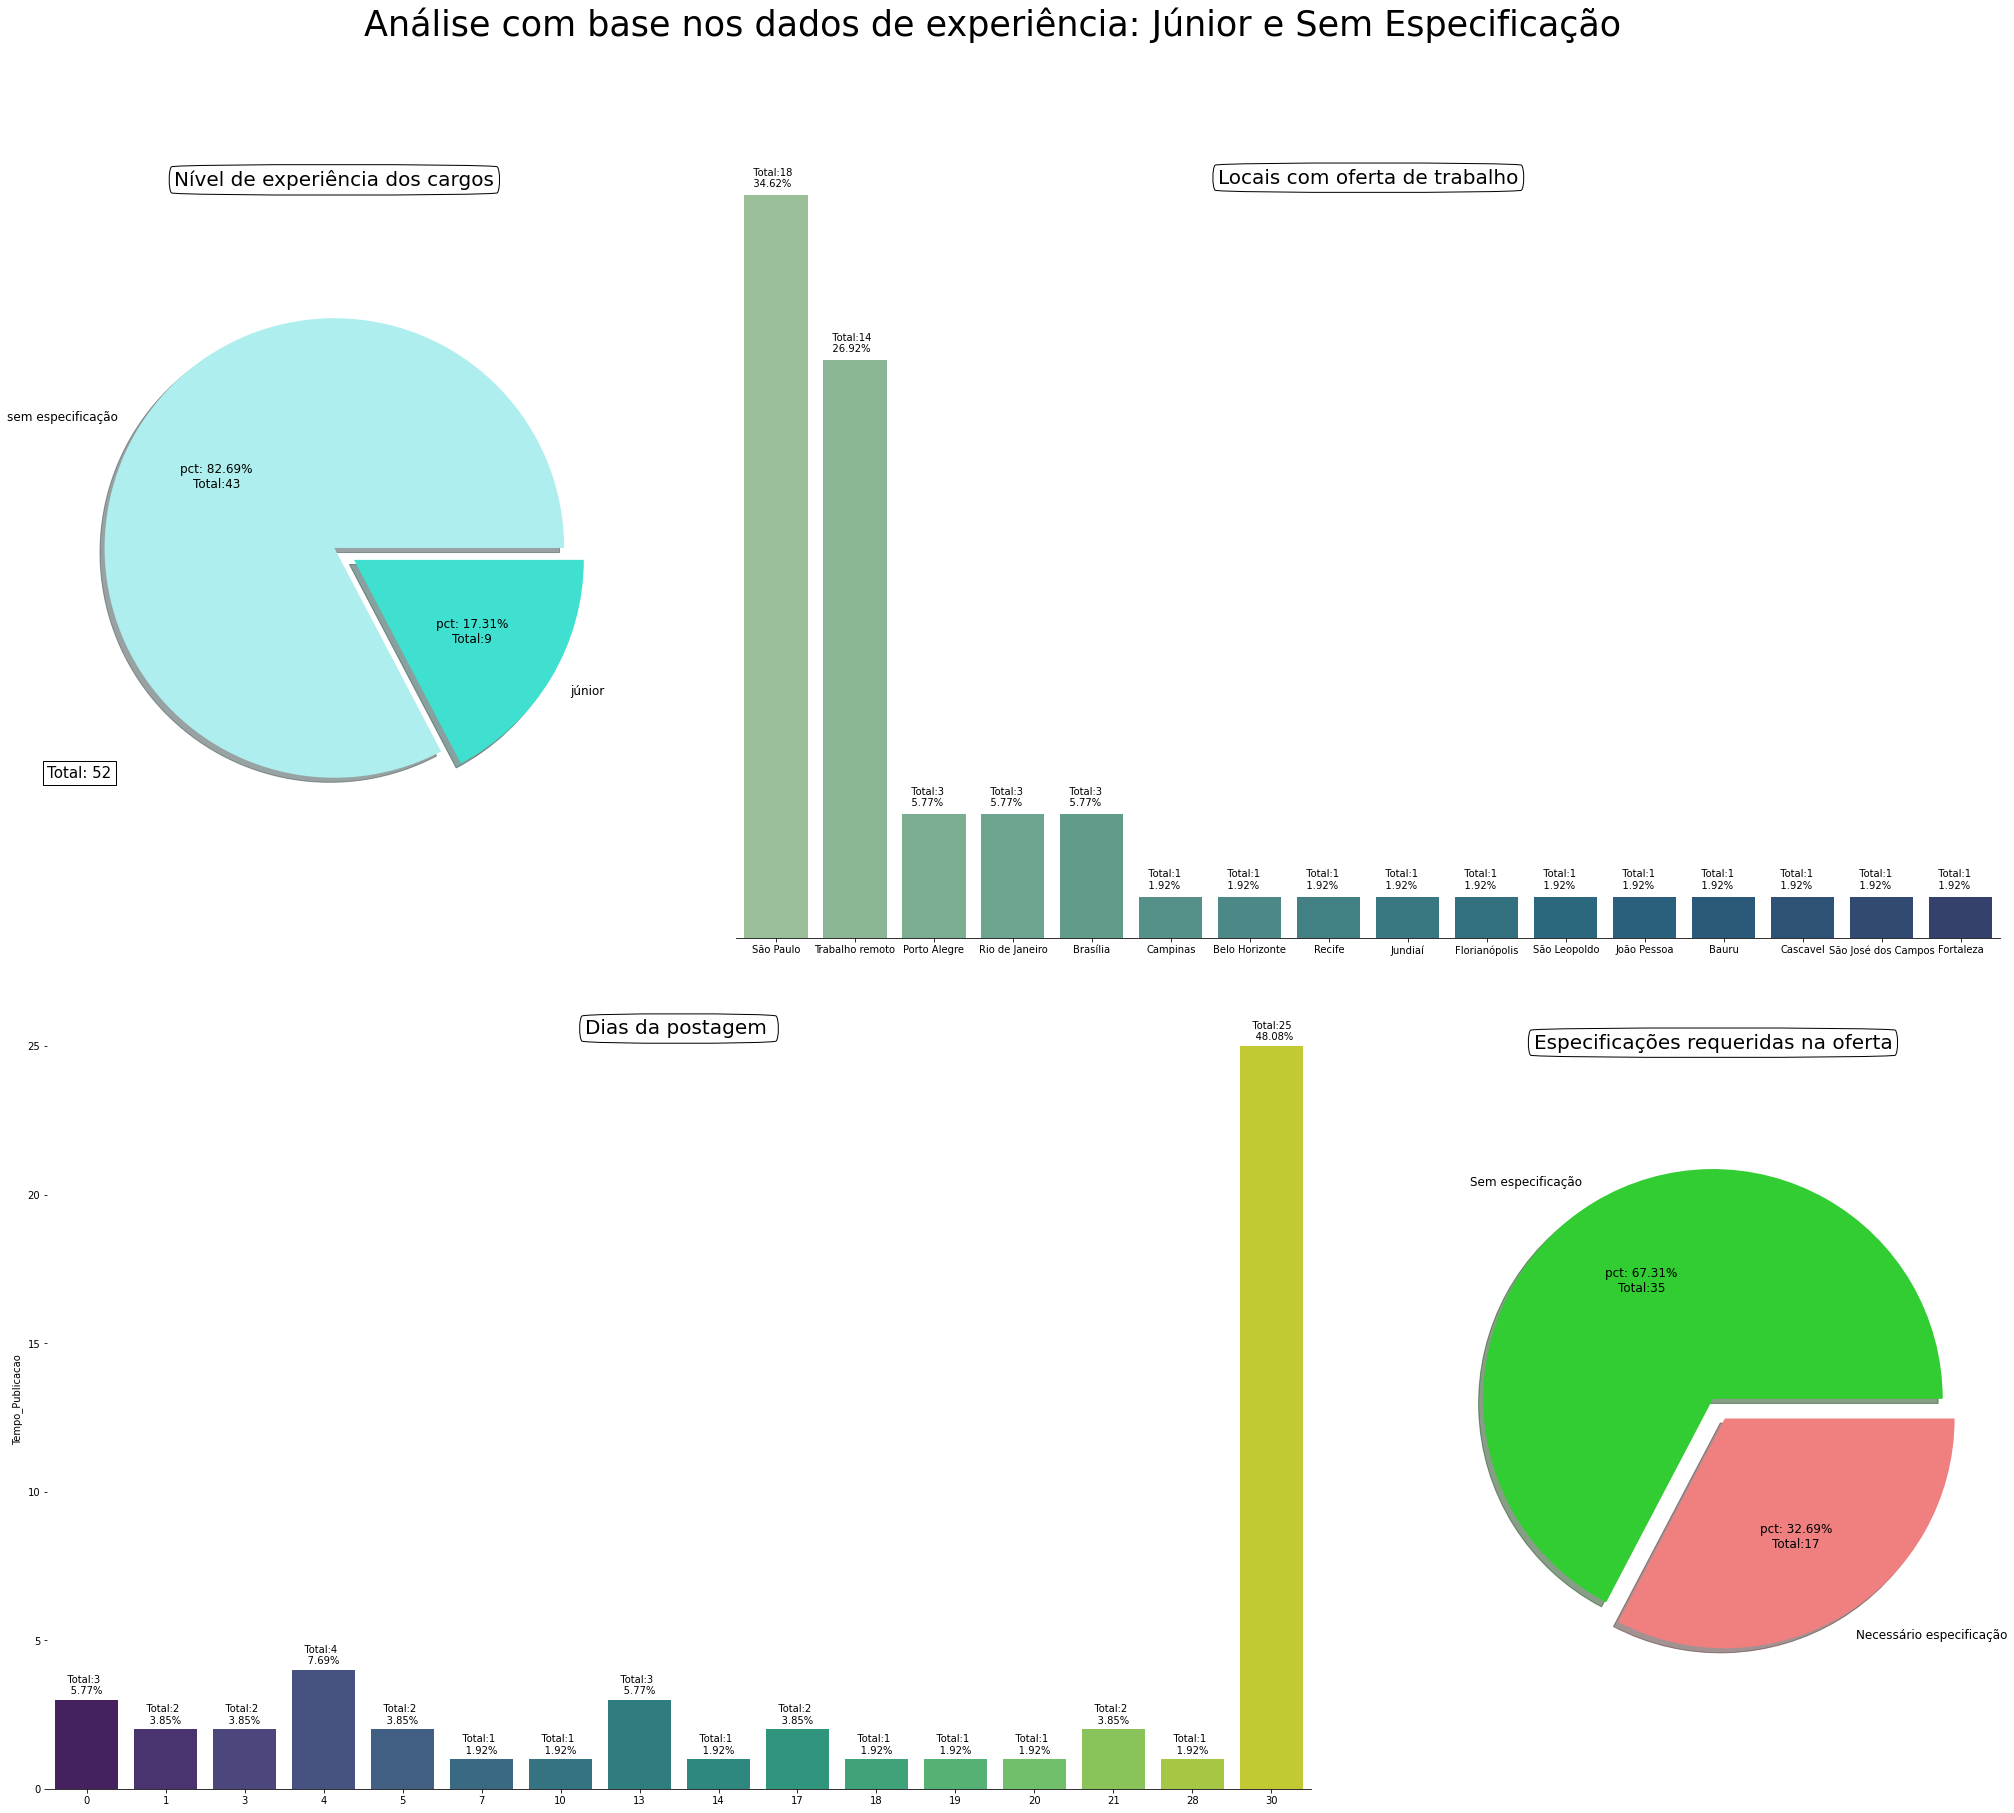

In [ ]:
imagem_3()

<h2>Análise com base nos dados de experiência: Júnior e Sem Especificação; para cientista de dados</h2>
 
- <h4>O primeiro gráfico de pizza, mostra que temos 52 vagas para esse grupo, sendo a maioria (82.69%) não definido na procura do nível de experiência exigido.
- <h4>Como avaliado anteriormente, São Paulo e a opção de trabalho remoto são as principais ofertas para esse profissional. Como eu moro no nordeste brasileiro, podemos ver opções também nessa região como Recife, João Pessoa e Fortaleza. Sendo ofertas bem escassas, mas existentes. 
- <h4>Observando o gráfico: Dias da postagem, é possível calcular um intervalo de 1.6, ou seja, a média de a cada 2 dias surgir 1.8 (arredondando pra 2) vagas.
- <h4>O gráfico de Especificações Requeridas é sobre o contratante ter colocado no anúncio da vaga algum requerimento de conhecimento, como: SQL, crédito, NLP, agricultura, etc. Sendo assim temos que 67.31 % dos contratantes não especificaram no anúncio, mas esse 32.69 % que especificaram possibilitam ao novo profissional conhecer as informações mais demandadas pelo mercado e buscar aprofundar seu conhecimento nesses campos.



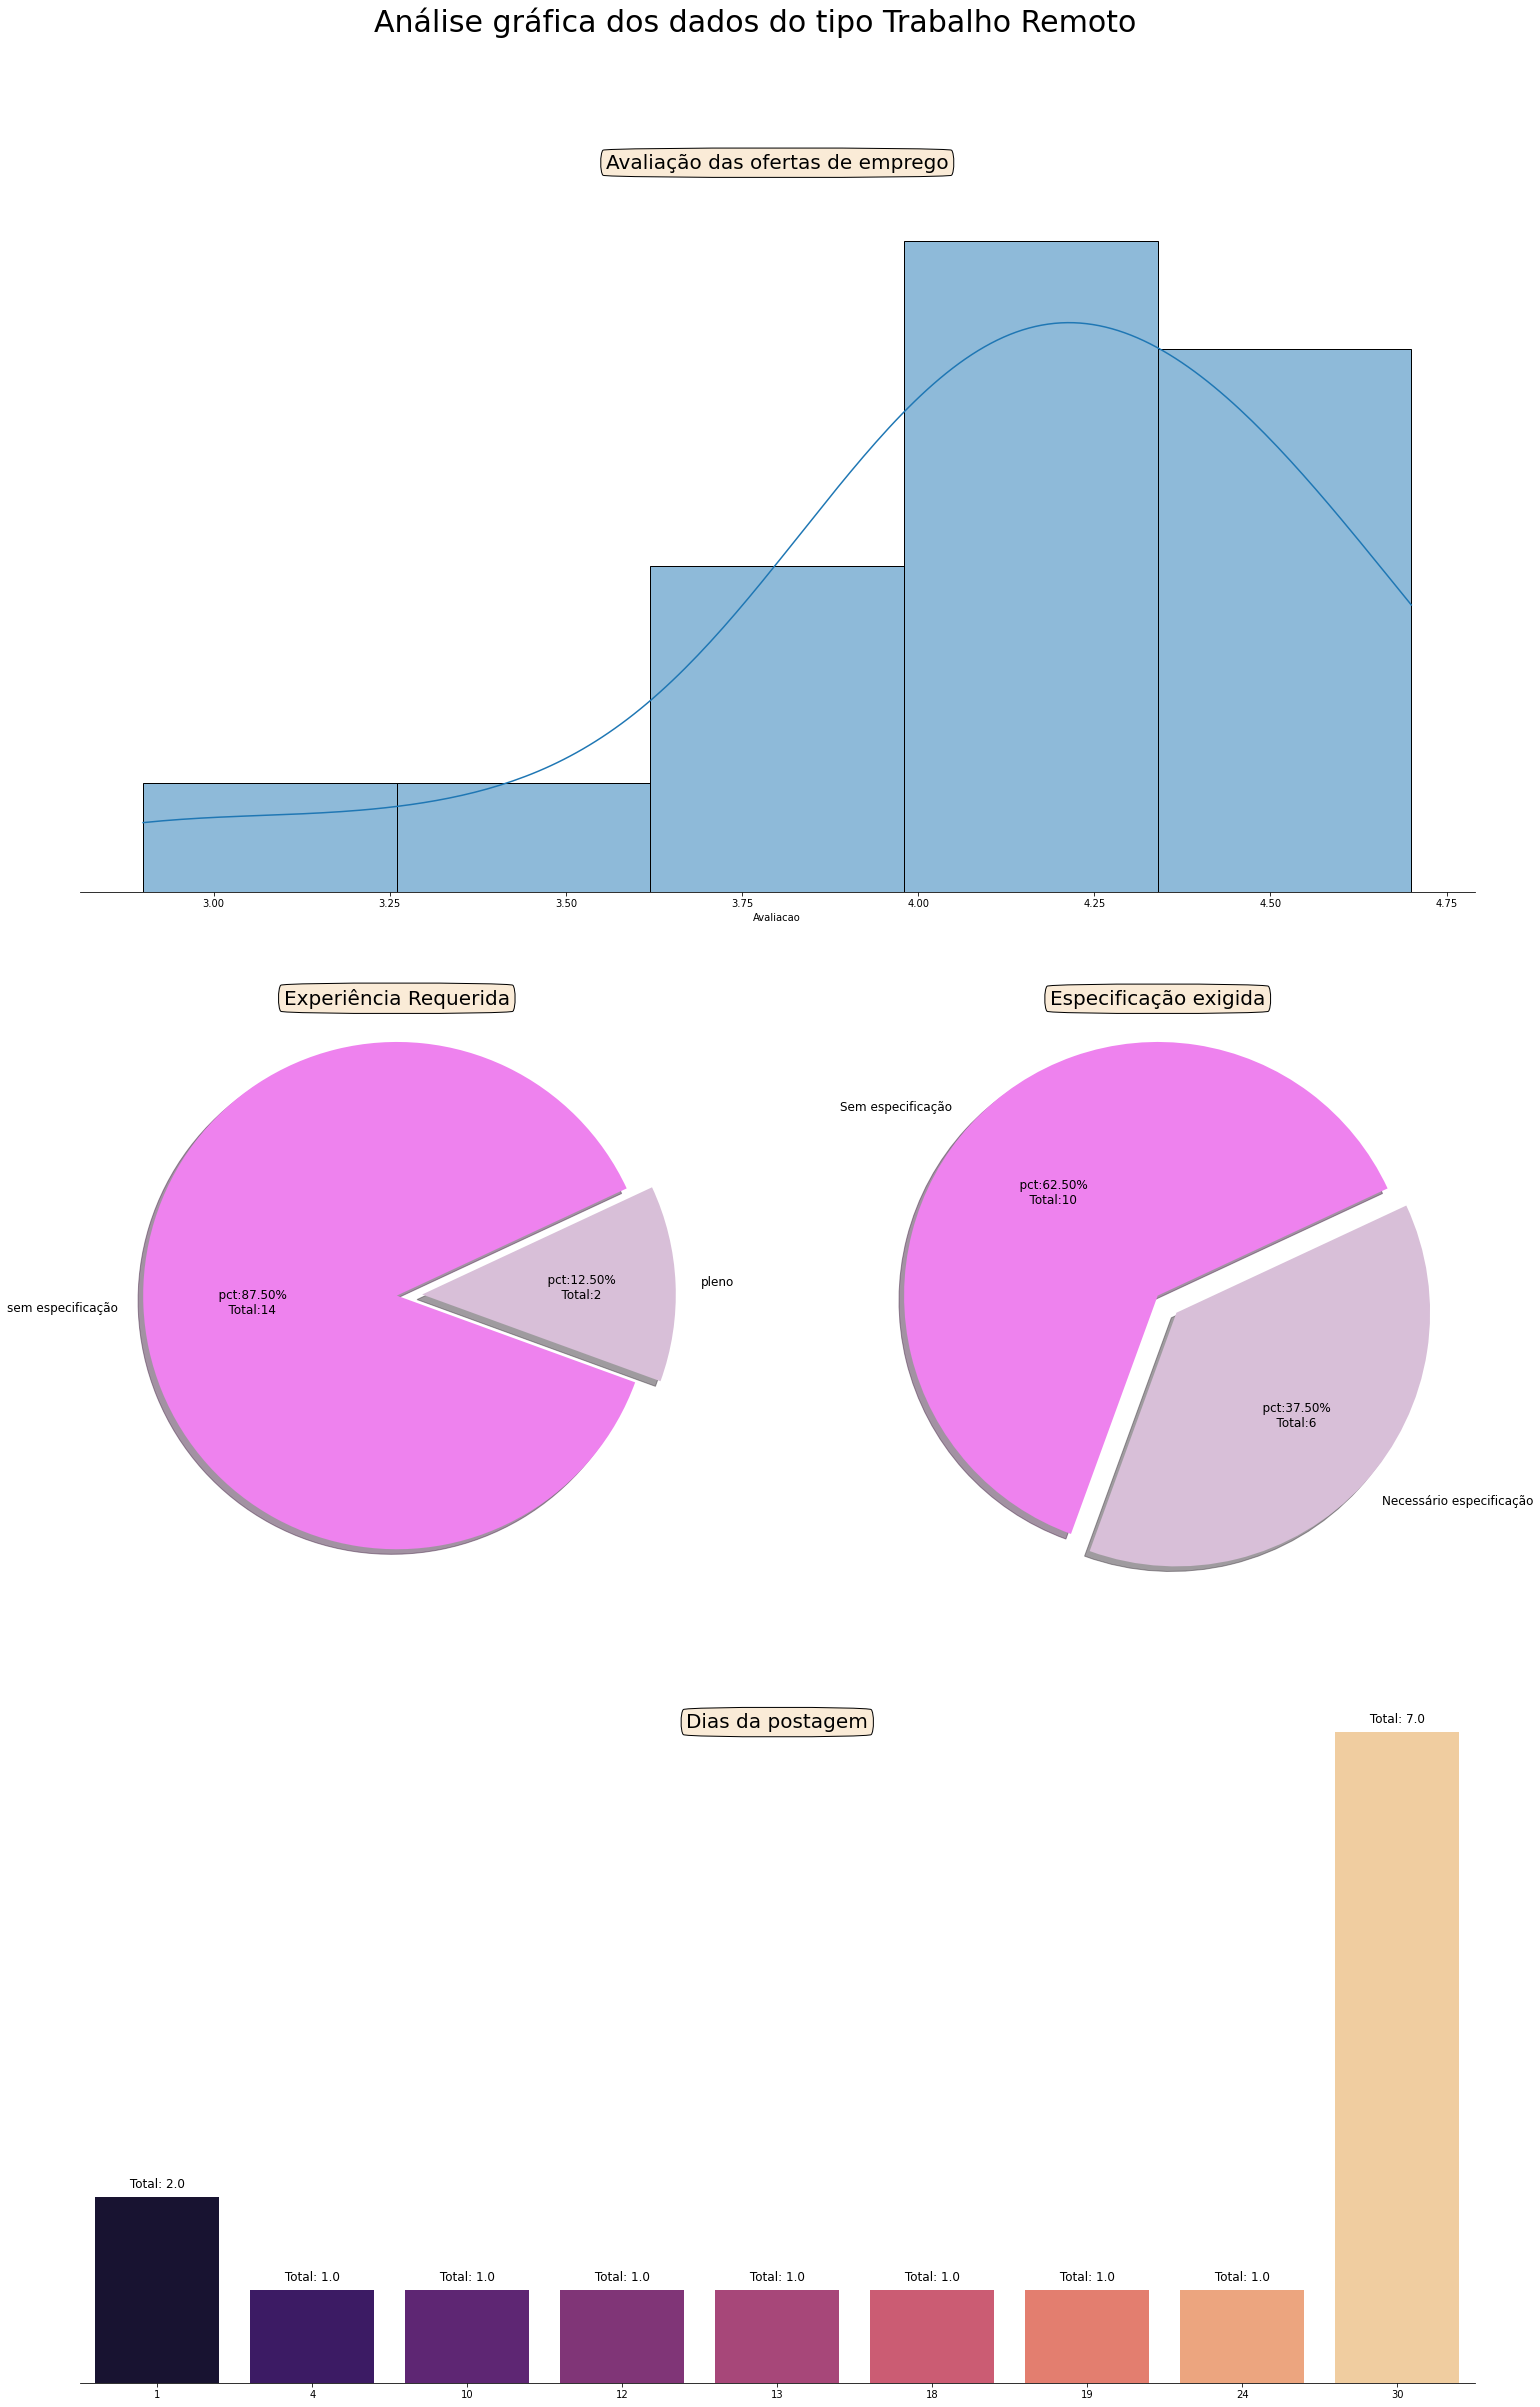

In [ ]:
imagem_4()

<h2>Análise gráfica dos dados de trabalho remoto</h2>
 
 
-  <h4>Como o trabalho remoto, pós pandemia, vem se mostrando mais produtivo e viável tanto para empresa quanto para o profissional, esse modelo de trabalho cresceu bastante. Sendo assim foi feito um levantamento gráfico somente sobre isso.
-  <h4>Avaliação das empresas contratantes, mostra que a maioria está acima de nota 4, sendo boas empresas para se trabalhar.
-  <h4>No modelo remoto temos que a maioria das vagas foram sem um requerimento de experiência na contratação (87.50 %), isso pode indicar um bom sinal para o profissional que está buscando uma vaga. 
-  <h4>Aqui já é exigido um conhecimento maior sobre conhecimentos da área, provavelmente devido ao trabalho ser a distância e ser necessário certos conhecimentos para isso. Assim o profissional pode estudar quais as linhas exigidas. 
-  <h4>Dias da postagem, em relação aos dados anteriores temos uma queda grande de intervalo e oferta sendo em torno de 3 dias aparecendo somente 1 vaga, então deve ser uma chance bem aproveitada para o novo profissional da área.

